# Install Citygmltools 
- In File Explorer, Shift + Right Click inside the folder.
- Choose “Open PowerShell window here” or “Open Command Prompt here”

Move the downloaded folder to C drive to shorter the file path


```
./citygml-tools to-cityjson Helsinki.gml
```

In [ ]:
# Example to load file from Github https://cityjson.github.io/cjio/api_tutorial_basics.html#Explore-the-city-model
from pathlib import Path
from cjio.cityjson import reader
import os
from copy import deepcopy
from cjio import cityjson
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

file_path = Path(r"~\Exercise files\Lecture 05 - CityGML\Helsinki.json")

if not file_path.is_file():
    print(f"File not found: {file_path}")
else:
    with file_path.open('r', encoding='utf-8') as f:
        model = reader(f)  # ✅ use reader directly
    print(type(model))


<class 'cjio.cityjson.CityJSON'>


In [31]:
# Check city objects in the cityjson file
city_objects = model.j["CityObjects"]
for obj_id, obj_data in city_objects.items():
    print(f"ID: {obj_id}, Type: {obj_data['type']}")


ID: BID_72ff6cde-e005-4dee-9c5f-daa6f3d86e82, Type: Building
ID: BID_e41aa6c6-e9fc-4f10-a934-a0a62b119776, Type: Building
ID: BID_6c21c6b6-44a6-4b6a-9851-dadf5b817d3d, Type: Building
ID: BID_2fb99b3c-fb6c-468b-a1b1-df8dcd568130, Type: Building
ID: BID_130ea57c-b50b-4e96-b95f-55e0a54ae24e, Type: Building
ID: BID_060185c1-432c-4cc4-876f-bab85460789c, Type: Building
ID: BID_065a0f87-d861-4ede-81a1-81b43ec67f37, Type: Building
ID: BID_f4bd24a6-9c5c-4d3a-ac78-3442a397eff5, Type: Building
ID: BID_42f30b71-92f4-44dd-864f-83bab5034fd6, Type: Building
ID: BID_cd5696b3-bb16-4aad-b2e3-cb1ee2fa2b08, Type: Building
ID: BID_9e4dd630-8876-4c84-8ec3-f487ab6a141d, Type: Building
ID: BID_62cdb5e5-e06d-4c28-811b-39bed767c0ed, Type: Building
ID: BID_73c87e50-ab90-45ed-9d72-6b3a0a9496f8, Type: Building
ID: BID_5890b16c-cd8e-4d38-8318-2652c2b5f9d0, Type: Building
ID: BID_e5f7dcfa-6908-4f2c-8dff-4a6de64b8e5c, Type: Building
ID: BID_19f6ed54-f4c9-4963-befb-0de0e4cf18bb, Type: Building
ID: BID_57b7d06f-f8b3-4c

In [8]:
# Make a dictionary of building_heights
building_heights = {}

city_objects = model.j["CityObjects"]
# model: This is your CityJSON object, created using reader(file) or CityJSON(file=...).
# .j: This is the internal dictionary that holds the raw CityJSON structure (like the full JSON content).
# ["CityObjects"]: This accesses the "CityObjects" key, which contains all the individual buildings, 
# building parts, trees, roads, etc., each identified by a unique ID


# Loops through each object in the CityObjects dictionary.
# obj_id is the unique identifier (like "UUID_LOD2_011387-...").
# obj_data is the full dictionary describing that object (type, geometry, attributes, etc.).
for obj_id, obj_data in city_objects.items():
    obj_type = obj_data.get("type", "") #Retrieves the object's type (e.g., "Building", "BuildingPart", "Road", etc.).
                                        #Uses .get() to avoid errors if "type" is missing; defaults to empty string.
    attributes = obj_data.get("attributes", {}) #- Retrieves the object's attributes dictionary.
    
    if obj_type in ["Building", "BuildingPart"] and "measuredHeight" in attributes:
        building_heights[obj_id] = attributes["measuredHeight"]
        #Stores the measuredHeight value in a dictionary called building_heights.
        #The key is the object ID, and the value is the height.

print(building_heights)

{'BID_72ff6cde-e005-4dee-9c5f-daa6f3d86e82': 3.7, 'BID_e41aa6c6-e9fc-4f10-a934-a0a62b119776': 31.0, 'BID_6c21c6b6-44a6-4b6a-9851-dadf5b817d3d': 3.7, 'BID_2fb99b3c-fb6c-468b-a1b1-df8dcd568130': 8.6, 'BID_130ea57c-b50b-4e96-b95f-55e0a54ae24e': 21.1, 'BID_060185c1-432c-4cc4-876f-bab85460789c': 23.0, 'BID_065a0f87-d861-4ede-81a1-81b43ec67f37': 4.4, 'BID_f4bd24a6-9c5c-4d3a-ac78-3442a397eff5': 11.3, 'BID_42f30b71-92f4-44dd-864f-83bab5034fd6': 31.6, 'BID_cd5696b3-bb16-4aad-b2e3-cb1ee2fa2b08': 19.6, 'BID_9e4dd630-8876-4c84-8ec3-f487ab6a141d': 25.9, 'BID_62cdb5e5-e06d-4c28-811b-39bed767c0ed': 24.0, 'BID_73c87e50-ab90-45ed-9d72-6b3a0a9496f8': 25.8, 'BID_5890b16c-cd8e-4d38-8318-2652c2b5f9d0': 26.8, 'BID_e5f7dcfa-6908-4f2c-8dff-4a6de64b8e5c': 4.3, 'BID_19f6ed54-f4c9-4963-befb-0de0e4cf18bb': 2.7, 'BID_57b7d06f-f8b3-4c88-870d-efaa9e67e13c': 4.0, 'BID_a3d28396-c2d9-4f4f-b201-8b92fe9adfa0': 3.4, 'BID_1242ae56-f22c-452d-9cca-8917d269f8c8': 6.6, 'BID_8a2c5985-7419-4307-a8af-c8db6224eac5': 23.9, 'BID_0a3

In [9]:
# Shorter version 
'''cj.j["CityObjects"] is guaranteed to contain the parsed objects from the file.
obj_data.get("attributes", {}) safely accesses the attributes dictionary.
This avoids relying on any internal object model that might not be initialized.'''


bd_heights = {}
for obj_id, obj_data in model.j["CityObjects"].items():
    if obj_data.get("type") in ["Building", "BuildingPart"]:
        height = obj_data.get("attributes", {}).get("measuredHeight")
        if height is not None:
            bd_heights[obj_id] = height

print(bd_heights)

{'BID_72ff6cde-e005-4dee-9c5f-daa6f3d86e82': 3.7, 'BID_e41aa6c6-e9fc-4f10-a934-a0a62b119776': 31.0, 'BID_6c21c6b6-44a6-4b6a-9851-dadf5b817d3d': 3.7, 'BID_2fb99b3c-fb6c-468b-a1b1-df8dcd568130': 8.6, 'BID_130ea57c-b50b-4e96-b95f-55e0a54ae24e': 21.1, 'BID_060185c1-432c-4cc4-876f-bab85460789c': 23.0, 'BID_065a0f87-d861-4ede-81a1-81b43ec67f37': 4.4, 'BID_f4bd24a6-9c5c-4d3a-ac78-3442a397eff5': 11.3, 'BID_42f30b71-92f4-44dd-864f-83bab5034fd6': 31.6, 'BID_cd5696b3-bb16-4aad-b2e3-cb1ee2fa2b08': 19.6, 'BID_9e4dd630-8876-4c84-8ec3-f487ab6a141d': 25.9, 'BID_62cdb5e5-e06d-4c28-811b-39bed767c0ed': 24.0, 'BID_73c87e50-ab90-45ed-9d72-6b3a0a9496f8': 25.8, 'BID_5890b16c-cd8e-4d38-8318-2652c2b5f9d0': 26.8, 'BID_e5f7dcfa-6908-4f2c-8dff-4a6de64b8e5c': 4.3, 'BID_19f6ed54-f4c9-4963-befb-0de0e4cf18bb': 2.7, 'BID_57b7d06f-f8b3-4c88-870d-efaa9e67e13c': 4.0, 'BID_a3d28396-c2d9-4f4f-b201-8b92fe9adfa0': 3.4, 'BID_1242ae56-f22c-452d-9cca-8917d269f8c8': 6.6, 'BID_8a2c5985-7419-4307-a8af-c8db6224eac5': 23.9, 'BID_0a3

In [69]:
'''
Input: dictionary of building IDs and their measuredHeight
Output: pandas DataFrame with height categories and building counts
'''
# Define bins and labels
bins = [0, 10, 20, 30, float('inf')]
labels = ['0-10m', '10-20m', '20-30m', '30m+']

# Convert dictionary to DataFrame
df = pd.DataFrame(list(bd_heights.items()), columns=['id', 'height'])

# Bin the heights
df['category'] = pd.cut(df['height'], bins=bins, labels=labels, right=False)

# Count buildings per category
distribution = df['category'].value_counts().sort_index().reset_index()
distribution.columns = ['Height Category', 'Number of Buildings']

print(distribution)

  Height Category  Number of Buildings
0           0-10m                  116
1          10-20m                   49
2          20-30m                   86
3            30m+                   11


# Exercise


In [77]:
import os
from copy import deepcopy
from cjio import cityjson
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [78]:
from cjio.cityjson import reader

def load_cj_file(file_path):
    '''
    Function to load the CityJSON file    
    '''
    if not file_path.is_file():
        print(f"File not found: {file_path}")
    else:
        with file_path.open('r', encoding='utf-8') as f:
            cj = reader(f)  
    return cj

In [79]:
def buildings_heights(cj):
    '''
    Function to generate a dictionary of Buildings and BuildingParts with their IDs and heights
    Input: CityJSON object
    Output: Dictionary {id: measuredHeight}
    '''
    bd_heights = {}
    for obj_id, obj_data in cj.j["CityObjects"].items():
        if obj_data.get("type") in ["Building", "BuildingPart"]:
            height = obj_data.get("attributes", {}).get("measuredHeight")
            if height is not None:
                bd_heights[obj_id] = height

    return bd_heights


In [80]:
def height_distribution(bd_heights):
    '''
    Function to generate the height distribution according to the building heights
    Input: dictionary of building IDs and their measuredHeight
    Output: pandas DataFrame with height categories and number of buildings in each category
            Categories: '0-10m', '10-20m', '20-30m', '30m+'
    '''
    # Define bins and labels
    bins = [0, 10, 20, 30, float('inf')]
    labels = ['0-10m', '10-20m', '20-30m', '30m+']

    # Convert dictionary to DataFrame
    df = pd.DataFrame(list(bd_heights.items()), columns=['id', 'height'])

    # Bin the heights
    df['category'] = pd.cut(df['height'], bins=bins, labels=labels, right=False)

    # Count buildings per category
    distribution = df['category'].value_counts().sort_index().reset_index()
    distribution.columns = ['Height Category', 'Number of Buildings']

    return distribution

In [81]:
def pie_chart(hd):
    '''
    Function to generatethe a pie chart according to the height distribution 
    Input: height distribution
    The function is to show the pie chart (or save the pie chart as a PNG file, optional)
    '''
    labels = hd['Height Category']
    sizes = hd['Number of Buildings']

    # Define a custom color palette
    colors = ['#f6f4d2', '#cbdfbd', "#f19c79", '#d4e09b']  # soft tones

    plt.figure(figsize=(10, 10))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=False, startangle=140)
    plt.title("Distribution of Building Heights")
    plt.show()


In [82]:

def main(file_path):
    '''
    Main integrated function
    Input: file path of the CityJSON
    The function is to show the pie chart (or save the pie chart as a PNG file, optional)
    '''
    # Add your code here
    model = load_cj_file(file_path)
    bd_heights = buildings_heights(model)
    height_dist = height_distribution(bd_heights)
    pie_chart(height_dist)

    return    

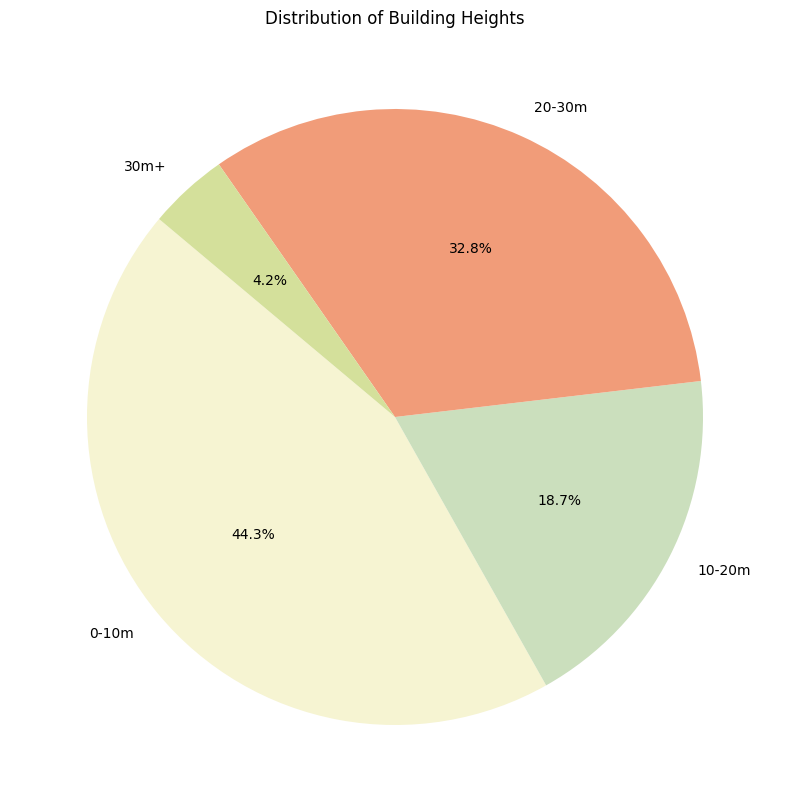

In [ ]:
if __name__ == "__main__":
    helsinki = Path(r"~\Exercise files\Lecture 05 - CityGML\Helsinki.json") # Replace the file path with your own
    main(helsinki)

## Exploring more attributes from the cityjson file

In [84]:
def buildings_classify(cj):
    '''
    Function to generate a dictionary of Building and Building Parts with their IDs, heights and usage.
    Input: CityJSON object
    Output: Dictionary 
    '''

    cityobjects = cj.j["CityObjects"]

    # Build the dictionary
    classified_dict = {}

    for cid, obj in cityobjects.items():
        if obj["type"] in ["Building", "BuildingPart"]:
            attrs = obj.get("attributes", {})
            height = attrs.get("measuredHeight", None)
            usage = attrs.get("usage", "Unknown")

            classified_dict[cid] = f"{height} - {usage}"
    
    return classified_dict

In [85]:
#Visualize the data
import pandas as pd

def classified_dict_to_dataframe(classified_dict):
    """
    Converts a dictionary {id: "height - usage"} into a DataFrame with separate columns.
    """
    # Convert to DataFrame
    df = pd.DataFrame.from_dict(classified_dict, orient='index', columns=['measuredHeight - usage'])
    df.index.name = 'id'
    df.reset_index(inplace=True)

    # Split into separate columns
    df[['measuredHeight', 'usage']] = df['measuredHeight - usage'].str.split(' - ', expand=True)
    df.drop(columns='measuredHeight - usage', inplace=True)

    print(df.head())

    return df

In [86]:
def get_unique_usages(classified_dict):
    usages = set()
    for value in classified_dict.values():
        # Split "height - usage" and take the usage part
        parts = value.split(" - ")
        if len(parts) == 2:
            usages.add(parts[1])
    return usages

In [87]:
def usage_distribution(cj):
    '''
    Function to generate the height distribution according to the building heights
    Input: cityJSON
    Output: pandas DataFrame with usage categories and number of buildings in each category
            Categories: Translated usage category in English
    '''
    # Build the dictionary
    bd_usages = {}
    for obj_id, obj_data in cj.j["CityObjects"].items():
        if obj_data.get("type") in ["Building", "BuildingPart"]:
            usage = obj_data.get("attributes", {}).get("usage")
            if usage is not None:
                bd_usages[obj_id] = usage


    # Get unique usage
    # unique_usages = set(bd_usages.values())

    usage_translation = {
        'Päiväkoti': 'Daycare',
        'Palvelutalo': 'Service',
        'Vartiorakennus': 'Guard building',
        'Vaja': 'Shed',
        'Muuntamo': 'Technical',
        'Toimistorakennus': 'Office',
        'Tehdas': 'Factory',
        'Autotalli': 'Garage',
        'Halli': 'Hall',
        'Liikerakennus': 'Commercial',
        'Asuinrakennus': 'Residential',
        'Asuin- ja liikerakennus': 'Residential and commercial building',
        'Sauna': 'Sauna',
        'Pukusuoja': 'Cloakroom',
        'Muu rakennus': 'Other building',
        'Varastorakennus': 'Warehouse',
        'Talousrakennus': 'Farm',
        'Kirkko': 'Church',
        'Käymälä': 'Toilet',
        'Opetusrakennus': 'Educational',
        'Kauppa tai kioski': 'Store',
        'Huoltorakennus': 'Maintenance building'
    }

    bd_usages_en = {
        obj_id: usage_translation.get(usage, "Unknown")
        for obj_id, usage in bd_usages.items()
    }


    # Define the bin and label
    usage_bins = {
        'Residential': 'Residential',
        'Residential and commercial building': 'Residential',
        'Garage': 'Residential',
        'Sauna': 'Residential',
        
        'Factory': 'Industrial',
        'Warehouse': 'Industrial',
        'Farm': 'Industrial',
        'Technical': 'Industrial',
        
        'Commercial': 'Commercial',
        'Store': 'Commercial',
        'Office': 'Commercial',
        'Hall': 'Commercial',
        
        'Daycare': 'Service',
        'Service': 'Service',
        'Educational': 'Service',
        'Church': 'Service',
        'Maintenance building': 'Service',
        'Guard building': 'Service',
        'Cloakroom': 'Service',
        
        'Shed': 'Other',
        'Toilet': 'Other',
        'Other building': 'Other'
    }


    # Convert to DataFrame
    df = pd.DataFrame.from_dict(bd_usages_en, orient='index', columns=['usage'])
    df.index.name = 'id'
    df.reset_index(inplace=True)

    # Apply usage bin mapping
    df['usage_bin'] = df['usage'].map(usage_bins).fillna('Other')


    # Count buildings per category
    usage_counts = df['usage_bin'].value_counts().reset_index()
    usage_counts.columns = ['Usage Category', 'Number of Buildings']

    return usage_counts

In [88]:
model_classified = buildings_classify(model)
df = classified_dict_to_dataframe(model_classified)
print(df)

print(get_unique_usages(model_classified))


                                         id measuredHeight           usage
0  BID_72ff6cde-e005-4dee-9c5f-daa6f3d86e82            3.7  Talousrakennus
1  BID_e41aa6c6-e9fc-4f10-a934-a0a62b119776           31.0   Liikerakennus
2  BID_6c21c6b6-44a6-4b6a-9851-dadf5b817d3d            3.7  Talousrakennus
3  BID_2fb99b3c-fb6c-468b-a1b1-df8dcd568130            8.6    Muu rakennus
4  BID_130ea57c-b50b-4e96-b95f-55e0a54ae24e           21.1   Asuinrakennus
                                           id measuredHeight           usage
0    BID_72ff6cde-e005-4dee-9c5f-daa6f3d86e82            3.7  Talousrakennus
1    BID_e41aa6c6-e9fc-4f10-a934-a0a62b119776           31.0   Liikerakennus
2    BID_6c21c6b6-44a6-4b6a-9851-dadf5b817d3d            3.7  Talousrakennus
3    BID_2fb99b3c-fb6c-468b-a1b1-df8dcd568130            8.6    Muu rakennus
4    BID_130ea57c-b50b-4e96-b95f-55e0a54ae24e           21.1   Asuinrakennus
..                                        ...            ...             ...
257  BID_06

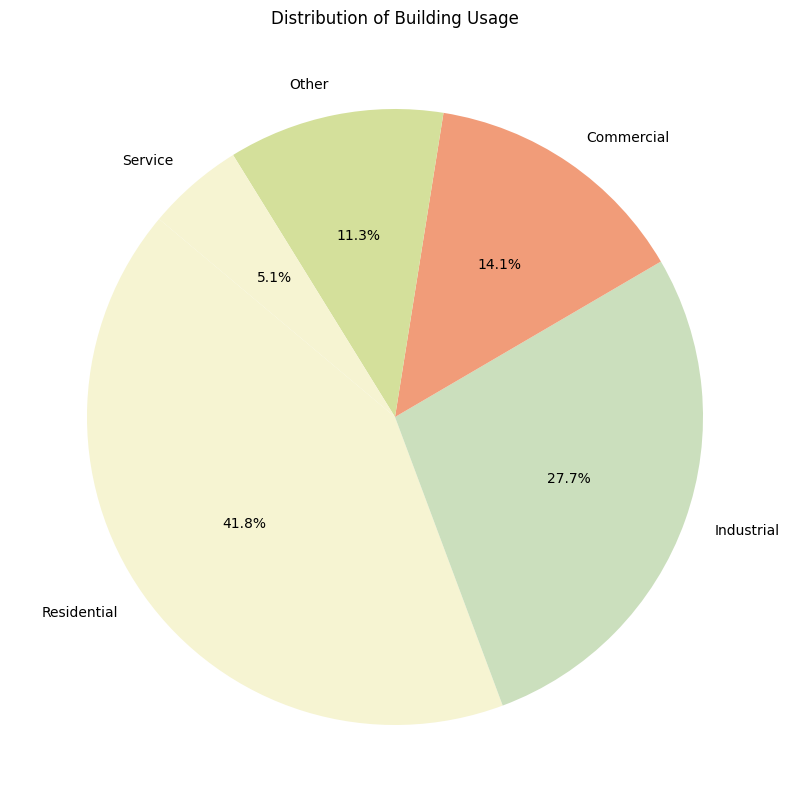

In [89]:
usage_dist=usage_distribution(model)
labels = usage_dist['Usage Category']
sizes = usage_dist['Number of Buildings']

# Define a custom color palette
colors = ['#f6f4d2', '#cbdfbd', "#f19c79", '#d4e09b']  # soft tones

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=140)
plt.title("Distribution of Building Usage")
plt.show()


In [ ]:
# Copy and save to another file
import json
from cjio.cityjson import reader
from pathlib import Path

# Load and save in one go
model = reader(Path(r"~\Exercise files\Lecture 05 - CityGML\Helsinki.json").open('r', encoding='utf-8'))

with open('copied_file.json', 'w', encoding='utf-8') as f_out:
    json.dump(model.j, f_out, indent=2)